In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#测试样本的数量
parameter=40
 

In [61]:
data=pd.DataFrame(index=range(0,parameter),columns=('score','label'))
data['label']=np.random.randint(0,2,size=len(data))
# np.random.choice从数组中随机抽取数字
data['score']=np.random.choice(np.arange(0.1,1,0.01),len(data['score']))

data.head()

,score,label
0,0.88,0
1,0.37,0
2,0.99,1
3,0.59,0
4,0.96,0


In [124]:

# 阈值
thresholds = data['score']

# 每个阈值对应一组混淆矩阵
CM_DF = pd.DataFrame(index=range(len(thresholds)),columns=('Threshold','TP','FP','TN','FN'))
CM_DF.fillna(0,inplace = True)
CM_DF['Threshold'] = thresholds
CM_DF = CM_DF.sort_values(by=['Threshold'], ascending=False)

def mapCM(row, threshold):
    s = row['score']
    l = row['label']
    if(s >= threshold):
        return 'TP' if l ==1 else 'FP'
    else:
        return 'FN' if l ==1 else 'TN'

def buildCM():
    for index, row in CM_DF.iterrows():
        t = row['Threshold']
        for i, r in data.iterrows():
            cur = mapCM(r,t)
            row[str(cur)] += 1
        # print(index, row)
        CM_DF.loc[index] = row

buildCM()
print(CM_DF)



    Threshold    TP    FP    TN    FN
2        0.99   1.0   0.0  17.0  22.0
32       0.98   2.0   0.0  17.0  21.0
17       0.97   3.0   0.0  17.0  20.0
4        0.96   4.0   1.0  16.0  19.0
29       0.96   4.0   1.0  16.0  19.0
8        0.95   4.0   2.0  15.0  19.0
19       0.93   5.0   3.0  14.0  18.0
22       0.93   5.0   3.0  14.0  18.0
12       0.92   7.0   3.0  14.0  16.0
9        0.92   7.0   3.0  14.0  16.0
33       0.88   8.0   4.0  13.0  15.0
0        0.88   8.0   4.0  13.0  15.0
10       0.87  10.0   5.0  12.0  13.0
23       0.87  10.0   5.0  12.0  13.0
37       0.87  10.0   5.0  12.0  13.0
18       0.85  11.0   6.0  11.0  12.0
15       0.85  11.0   6.0  11.0  12.0
13       0.84  11.0   7.0  10.0  12.0
39       0.71  12.0   7.0  10.0  11.0
26       0.70  12.0   8.0   9.0  11.0
6        0.68  13.0   8.0   9.0  10.0
3        0.59  13.0   9.0   8.0  10.0
21       0.57  13.0  10.0   7.0  10.0
34       0.47  14.0  10.0   7.0   9.0
24       0.45  15.0  10.0   7.0   8.0
5        0.4

In [89]:
CM_DF['TPR'] = CM_DF['TP'] / (CM_DF['TP'] + CM_DF['FN'])
CM_DF['FPR'] = CM_DF['FP'] / (CM_DF['FP'] + CM_DF['TN'])
CM_DF

,Threshold,TP,FP,TN,FN,TPR,FPR
2,0.99,1.0,0.0,17.0,22.0,0.043478,0.000000
32,0.98,2.0,0.0,17.0,21.0,0.086957,0.000000
17,0.97,3.0,0.0,17.0,20.0,0.130435,0.000000
4,0.96,4.0,1.0,16.0,19.0,0.173913,0.058824
29,0.96,4.0,1.0,16.0,19.0,0.173913,0.058824
8,0.95,4.0,2.0,15.0,19.0,0.173913,0.117647
19,0.93,5.0,3.0,14.0,18.0,0.217391,0.176471
22,0.93,5.0,3.0,14.0,18.0,0.217391,0.176471
12,0.92,7.0,3.0,14.0,16.0,0.304348,0.176471
9,0.92,7.0,3.0,14.0,16.0,0.304348,0.176471


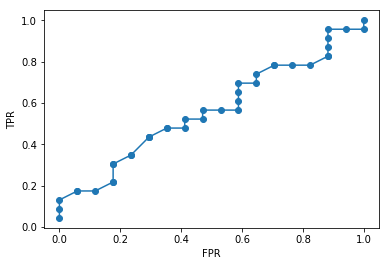

In [90]:
#show roc
plt.plot(CM_DF['FPR'], CM_DF['TPR'], marker = 'o')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

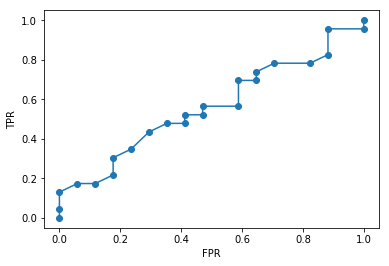

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(data['label'], data['score'], pos_label=1)

# print(fpr)
# print(tpr)
# print(thresholds)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,tpr,marker = 'o')
plt.show()

In [121]:
# 计算AUC

new_data = data.sort_values(by=['score'])
# rank的时候从1开始算
new_data['rank'] = range(1, len(new_data) + 1)

new_data['rank'] = new_data.groupby(['score'])['rank'].transform('mean')

M = new_data[new_data['label'] == 1]['label'].count()
N = new_data[new_data['label'] == 0]['label'].count()

rank_sum_p = new_data[new_data['label'] == 1]['rank'].sum()



In [122]:
auc1 = (rank_sum_p - (M * (M + 1) /2)) / (M * N)
auc1

0.5626598465473146

In [120]:
auc2 = roc_auc_score(data['label'], data['score'])
auc2

0.5626598465473146